Xinyu Chen

In my part, I need to analysis the security of different neighborhoods in Pittsburgh. After that, I should find some neighborhoods with better police. Through the dat set I found, I determine the security of each neighborhood by the number of arrests recorded. So I could combine my data set with the rest of the group's data set to select the best neighborhoods in Pittsburgh.

First, I find a data set in the western Pennsylvania regional data center. This data set shows the Pittsburgh's record of arrests from 2016 to the present. And also, this data set provides the sex, race, time of arrest and location of the offender.

In [1]:
import pandas as pd
import geopandas
Arrest = pd.read_csv("Arrest in Pittsburgh.csv")
import matplotlib.pyplot as plt
Arrest.iloc[:,:]

,_id,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1,1975272,16158872,42.0,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.0,8.0,2.0,-79.949277,40.452551
1,2,1974456,16144120,31.0,M,W,2016-08-03T14:55:00,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City,OSC,5599.0,NaN,NaN,-80.088018,40.440136
2,3,1974466,16144165,63.0,F,B,2016-08-03T16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811.0,9.0,2.0,-79.891803,40.486625
3,4,1974550,16145257,25.0,F,W,2016-08-05T02:36:00,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-80.001939,40.454080
4,5,1974596,16145962,25.0,M,B,2016-08-06T02:00:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,5,2814.0,2.0,5.0,-80.052204,40.445900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66477,88273,2064626,23150285,65.0,M,B,2023-09-26T10:30:00,"2800 Block Bedford AV Pittsburgh, PA 15219",3502 Burglary. / 3921(a) Theft by Unlawful Tak...,"1500 Block S Dallas AV Pittsburgh, PA 15217",Point Breeze,4,1406.0,9.0,3.0,-79.912484,40.441636
66478,88274,2064627,23175998,40.0,M,W,2023-11-05T16:19:00,"1400 Block Sheffield ST Pittsburgh, PA 15233",3304 Criminal Mischief. / 3502 Burglary. / 392...,"1400 Block Sheffield ST Pittsburgh, PA 15233",Manchester,1,2107.0,6.0,1.0,-80.026065,40.453105
66479,88275,2064628,23179042,44.0,F,B,2023-11-11T03:41:00,"900 Block Brookline BL Pittsburgh, PA 15226",5104 Resisting Arrest or Other Law Enforcement...,"900 Block Brookline BL Pittsburgh, PA 15226",Brookline,6,1918.0,4.0,5.0,-80.019190,40.392879
66480,88276,2064629,23140205,18.0,M,B,2023-11-04T00:49:00,"6600 Block Frankstown AV Pittsburgh, PA 15206",2702 Aggravated Assault. / 2705 Recklessy Enda...,"N Murtland ST Pittsburgh, PA 15208",Homewood North,3,1302.0,NaN,NaN,NaN,NaN


In [2]:
Arrest.shape

(66482, 17)

Because the data is more, and many kinds we do not need to use，I separate out the neighborhoods where crime has occurred. then, I get the incidentneighborhood. hence, we can see exactly where the arrests are taking place.

In [3]:
import pandas as pd
Arrest = pd.read_csv("Arrest in Pittsburgh.csv")
import matplotlib.pyplot as plt
Arrest[['INCIDENTNEIGHBORHOOD']]

,INCIDENTNEIGHBORHOOD
0,Bloomfield
1,Outside City
2,Westwood
3,East Allegheny
4,Crafton Heights
...,...
66477,Point Breeze
66478,Manchester
66479,Brookline
66480,Homewood North


This is the number of arrests recorded from highest to lowest in each neighborhood in Pittsburgh.The top five neighborhoods with the highest arrest rates are "Outside City", "Homewood North", "Brookline", "Manchester" and "Point Breeze". The top five neighborhoods with the lowest arrest rates are "Crafton Heights", "East Allegheny", "Westwood", "Outside City" and "Bloomfield".

In [4]:
Arrest['INCIDENTNEIGHBORHOOD'].value_counts()

Central Business District    4440
South Side Flats             3497
Carrick                      2351
East Allegheny               2217
Homewood South               2090
                             ... 
Regent Square                  37
Central Northside              23
Mt. Oliver Boro                18
Troy Hill-Herrs Island          6
Mt. Oliver Neighborhood         2
Name: INCIDENTNEIGHBORHOOD, Length: 98, dtype: int64

In [5]:
Arrest['INCIDENTNEIGHBORHOOD'].value_counts().to_csv('incident neighborhood 2.csv')

In [6]:
arresttotal = Arrest.groupby('INCIDENTNEIGHBORHOOD').count()['OFFENSES']
arresttotal.sort_values(ascending=True)

INCIDENTNEIGHBORHOOD
Mt. Oliver Neighborhood         2
Troy Hill-Herrs Island          6
Mt. Oliver Boro                18
Central Northside              23
Ridgemont                      37
                             ... 
Homewood South               2089
East Allegheny               2216
Carrick                      2351
South Side Flats             3497
Central Business District    4440
Name: OFFENSES, Length: 98, dtype: int64

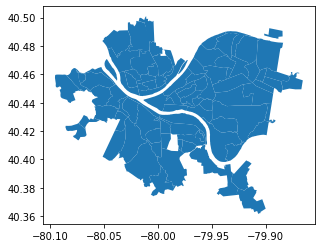

In [9]:
neighborhoods = geopandas.read_file("final/Neighborhoods_.shp") 
neighborhoods.plot()

In [10]:
arrest_map = neighborhoods.merge(arresttotal, how='left', left_on='hood', right_on='INCIDENTNEIGHBORHOOD')

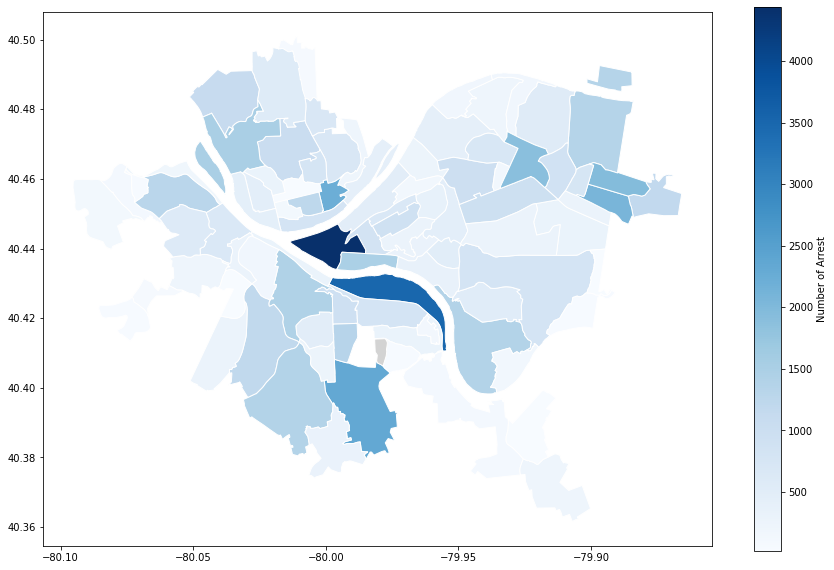

In [11]:
arrest_map.plot(column='OFFENSES', 
               cmap='Blues',             
               edgecolor="white",        
               legend=True,              
               legend_kwds={'label': "Number of Arrest"}, 
               figsize=(15, 10),        
               missing_kwds={"color": "lightgrey"} 
               )

Finally, I use a map of Pittsburgh to better illustrate the security situation in each neighborhood.The darker the color, the higher the crime rate. Conversely, lighter colors indicate lower crime rates in neighborhoods. Hence, you can see clearly on the map that there are some high crime neighborhoods on the north and south sides of Pittsburgh. And also, neighborhoods to the east and west of Pittsburgh are relatively safe.

Conclusion:

Through the data, the top five neighborhoods with the highest arrest rates in Pittsburgh are "Outside City", "Homewood North", "Brookline", "Manchester" and "Point Breeze", The top five neighborhoods in Pittsburgh with the lowest arrest rates are "Crafton Heights", "East Allegheny", "Westwood", "Outside City" and "Bloomfield".I hadn't heard of these five communities, though they had the lowest crime rates. I think it's possible that these communities have a lower population that leads to less crime. So my data is one-dimensional, and it doesn't show you how good a neighborhood is, it just tells you how safe it is.

The best neighborhood I found is Mt. Oliver Neighborhood with the lowest arrest rate. it may be the best in terms of policing, but in many ways it's not necessarily the best. It may be the best in terms of policing, but in many ways it's not necessarily the best. I live in North Oakland now, and my neighborhood doesn't present a bad number of arrests, and my neighborhood has a lot of good food and is close to the grocery store. So I think North Oakland is the best neighborhood for me.